In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
## 0,1,2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [6]:
train_labels[10]

3

In [7]:
import numpy as np

## 멀티-핫 인코딩 -> 멀티-핫 벡터로 변환
def vectorize_sequences(sequences, dimension=10000):
    ## 크기가(len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듦
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. ## results[i]에사 특정 인덱스의 위치를 1로 만듦
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    ## 각 입력 샘플마다 46개의 출력 클래스에 대한 확룰 분포를 출력
    ## 확룰을 모두 더하면 1
    layers.Dense(46, activation="softmax") 
])

In [12]:
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [14]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20, ## 20번의 에포크로 모델을 훈련
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3624 - loss: 3.0736 - val_accuracy: 0.6180 - val_loss: 1.7602
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6613 - loss: 1.5989 - val_accuracy: 0.6920 - val_loss: 1.3633
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7337 - loss: 1.2238 - val_accuracy: 0.7330 - val_loss: 1.1930
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7816 - loss: 1.0085 - val_accuracy: 0.7540 - val_loss: 1.0966
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8198 - loss: 0.8206 - val_accuracy: 0.7850 - val_loss: 1.0037
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8567 - loss: 0.6817 - val_accuracy: 0.7940 - val_loss: 0.9517
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8816 - loss: 0.5741 - val_accuracy: 0.7960 - val_loss: 0.9085
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9004 - loss: 0.4842 - val_accuracy: 0.8060 - val

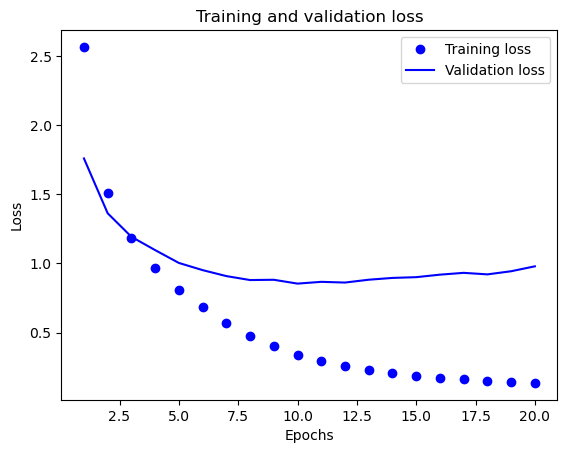

In [15]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

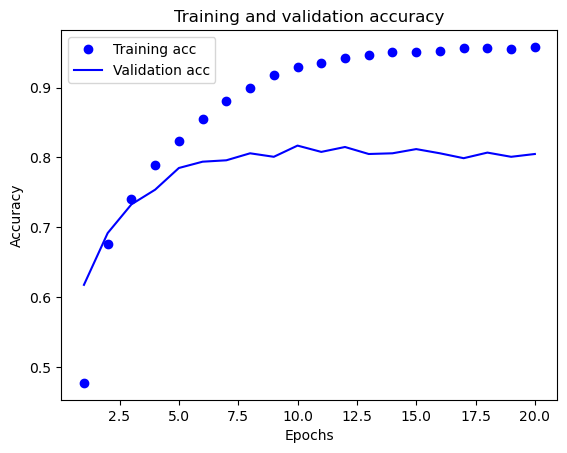

In [16]:
plt.clf() ## 그래프 초기화
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3891 - loss: 3.2422
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6834 - loss: 1.6338
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7512 - loss: 1.1802
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8021 - loss: 0.9319
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8342 - loss: 0.7749
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8659 - loss: 0.6307
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8882 - loss: 0.5182
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9115 - loss: 0.4245
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9232 - loss: 0.3665
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.7943 - loss: 0.9079


In [18]:
results

[0.9618091583251953, 0.7836152911186218]

In [19]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.182546749777382

In [20]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


In [21]:
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

1.0

In [23]:
np.argmax(predictions[0])

3

In [24]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [25]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [26]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

model.fit(partial_x_train,
            partial_y_train,
            epochs=9,
            batch_size=512,
            validation_data=(x_val, y_val))

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3790 - loss: 3.3303 - val_accuracy: 0.6000 - val_loss: 1.9430
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6547 - loss: 1.7197 - val_accuracy: 0.6840 - val_loss: 1.4397
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7326 - loss: 1.2575 - val_accuracy: 0.7350 - val_loss: 1.2539
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7860 - loss: 1.0280 - val_accuracy: 0.7600 - val_loss: 1.1190
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8215 - loss: 0.8475 - val_accuracy: 0.7830 - val_loss: 1.0373
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8444 - loss: 0.7460 - val_accuracy: 0.7890 - val_loss: 0.9984
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8816 - loss: 0.6020 - val_accuracy: 0.8050 - val_loss: 0.9510
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8966 - loss: 0.4954 - val_accuracy: 0.8070 - val_loss: